In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)   
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import nltk
from collections import Counter

In [2]:
df = pd.read_table('SMSSpamCollection+(1)', header=None, names=['Class', 'sms'])

In [3]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Cleaning

In [4]:
df.isnull().sum()

Class    0
sms      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

df['Class'] = encoder.fit_transform(df['Class'])

df.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Check for duplicate values
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print('-'*25)
print(df.duplicated().sum())

403
-------------------------
0


In [8]:
df.shape

(5169, 2)

# EDA

In [9]:
df['Class'].value_counts()

0    4516
1     653
Name: Class, dtype: int64

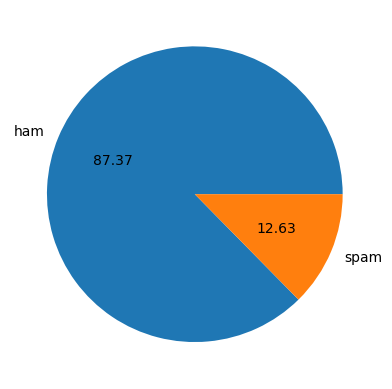

In [10]:
plt.pie(df['Class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [11]:
df['num_characters'] = df['sms'].apply(len)

In [12]:
df.head()

,Class,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Vikyath
[nltk_data]     Shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(5)

,Class,sms,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [15]:
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,Class,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.591023,1.954924
std,58.437457,13.402840,1.366937
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [17]:
# ham
df[df['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.264836,1.806244
std,56.715046,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [18]:
# spam
df[df['Class'] == 1][['num_characters','num_words','num_sentences']].describe()
#Mean value of spam is greater than that of ham

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.983155
std,29.821348,6.993008,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


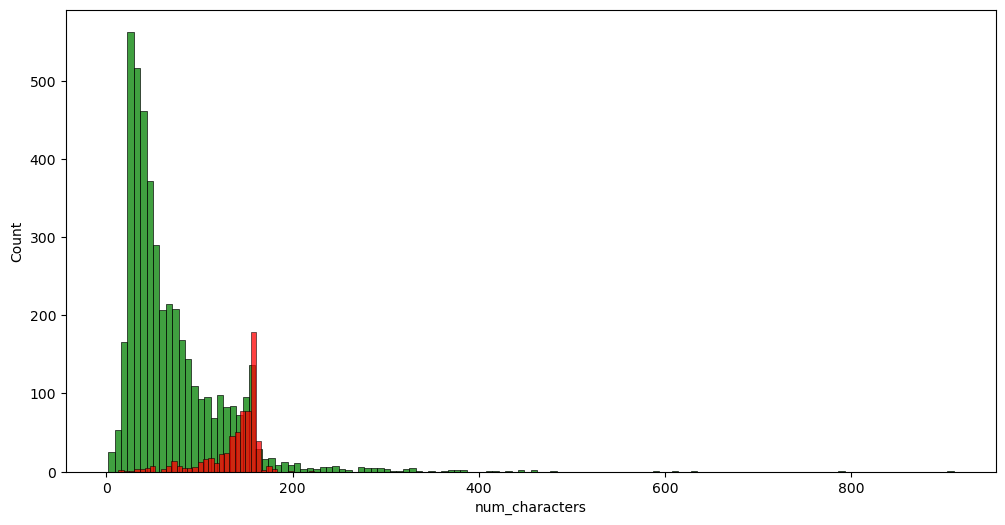

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['Class'] == 1]['num_characters'],color='red')
plt.show()

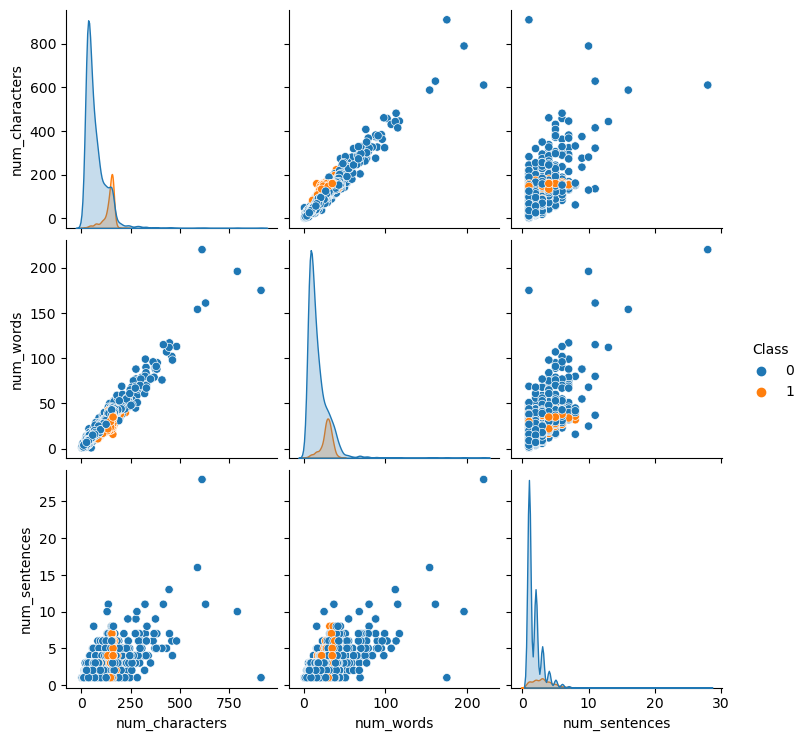

In [20]:
sns.pairplot(df,hue='Class')
plt.show()

<Axes: >

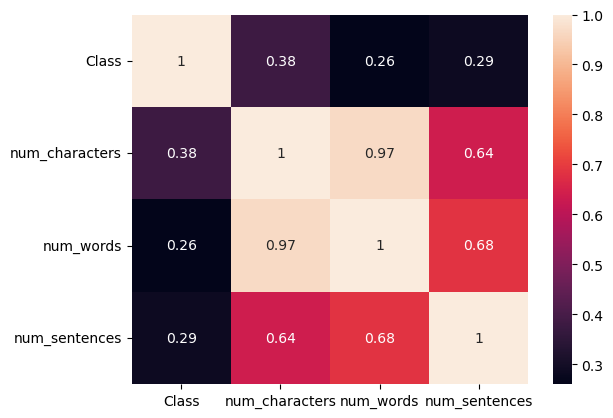

In [21]:
 sns.heatmap(df[['Class', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

# Data Pre-processing

In [22]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [23]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)
    
    ps = PorterStemmer()
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return ' '.join(y)

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Vikyath
[nltk_data]     Shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
df['transformed_text'] = df['sms'].apply(transform_text)

In [26]:
df = df.drop("sms",axis = 1)

In [27]:
df.head()

,Class,num_characters,num_words,num_sentences,transformed_text
0,0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,29,8,2,ok lar joke wif u oni
2,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,u dun say earli hor u c alreadi say
4,0,61,15,1,nah think goe usf live around though


In [28]:
spam_corpus = []
for message in df[df['Class'] == 1]['transformed_text'].to_list():
    for word in message.split():
        spam_corpus.append(word)

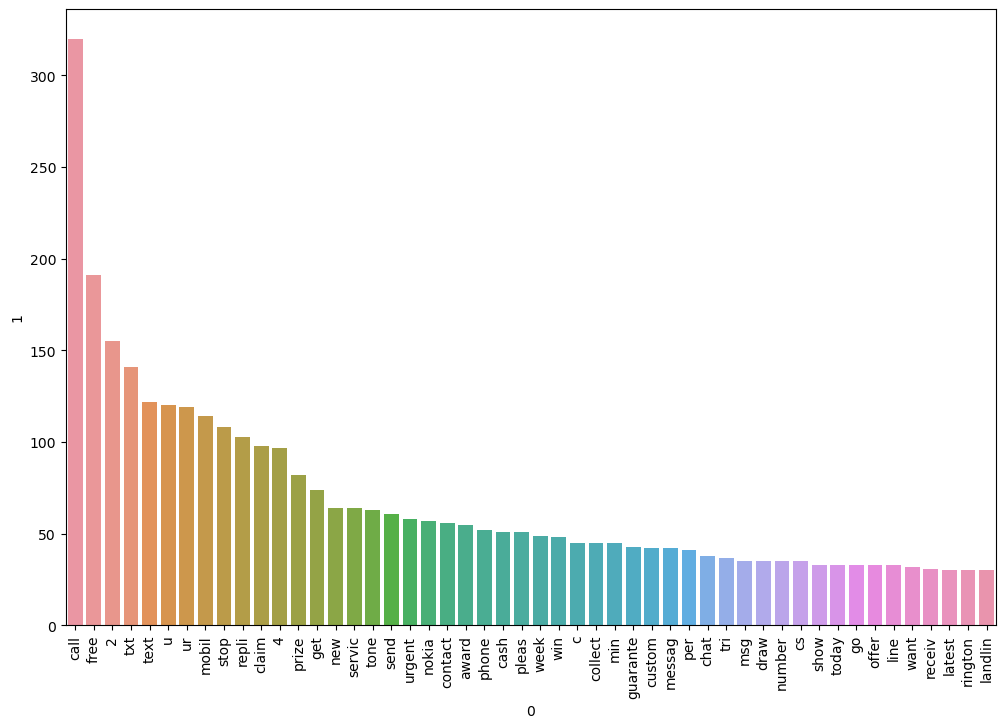

In [29]:
spam_corpus_dataframe = pd.DataFrame(Counter(spam_corpus).most_common(50))

plt.figure(figsize = (12,8))
sns.barplot( x = spam_corpus_dataframe[0], y = spam_corpus_dataframe[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
ham_corpus = []
for message in df[df['Class'] == 0]['transformed_text'].to_list():
    for word in message.split():
        ham_corpus.append(word)

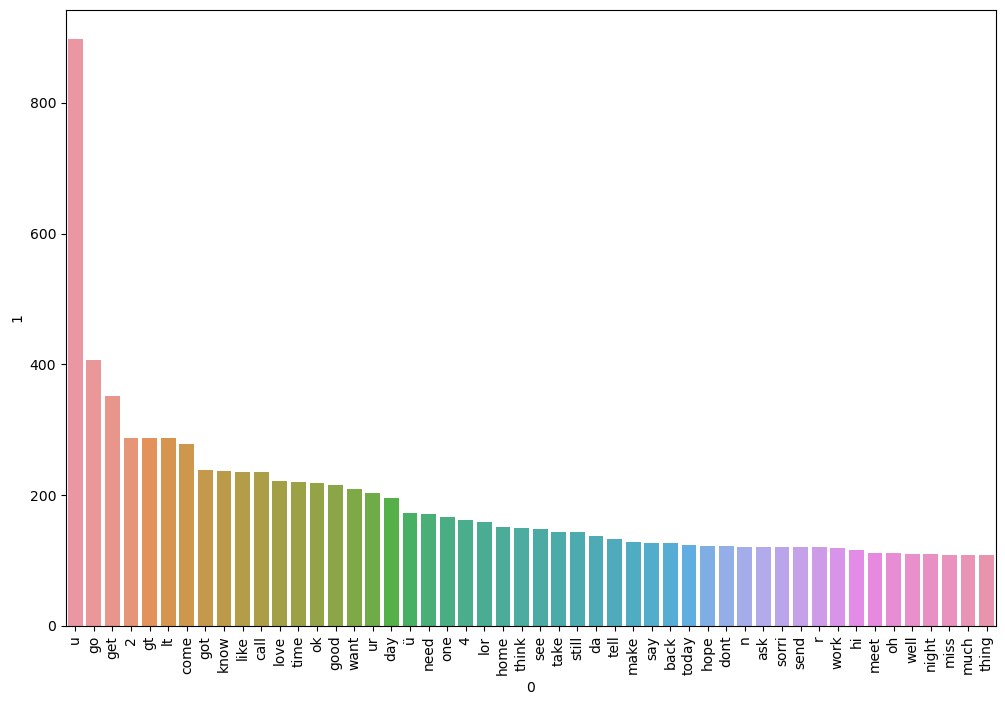

In [31]:
ham_corpus_dataframe = pd.DataFrame(Counter(ham_corpus).most_common(50))

plt.figure(figsize = (12,8))
sns.barplot( x = ham_corpus_dataframe[0], y = ham_corpus_dataframe[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['Class'].values
print(X.shape)
print(y.shape)

(5169, 6782)
(5169,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 40)
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

print(accuracy_score(y_test,gnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,gnb_y_pred))
print('-'*20)
print(precision_score(y_test,gnb_y_pred))

0.8692962103634957
--------------------
[[961 146]
 [ 23 163]]
--------------------
0.5275080906148867


In [40]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=40)

In [41]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc,
}

In [42]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [43]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9288476411446249
Precision -  0.79375
For  KN
Accuracy -  0.897138437741686
Precision -  1.0
For  NB
Accuracy -  0.9698375870069605
Precision -  0.9060773480662984
For  DT
Accuracy -  0.9234338747099768
Precision -  0.9578947368421052
For  LR
Accuracy -  0.9667440061871616
Precision -  0.9612903225806452
For  RF
Accuracy -  0.9590100541376644
Precision -  0.9925925925925926


In [44]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.897138,1.000000
5,RF,0.959010,0.992593
4,LR,0.966744,0.961290
3,DT,0.923434,0.957895
2,NB,0.969838,0.906077
0,SVC,0.928848,0.793750
